In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing.data_loading as dl
import data_preprocessing.data_preprocess as dp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
b = np.arange(4,8)
a = np.flip(b)
d = dict(zip(b,a))
d

{np.int64(4): np.int64(7),
 np.int64(5): np.int64(6),
 np.int64(6): np.int64(5),
 np.int64(7): np.int64(4)}

In [8]:
df, _ = dl.get_gesis_data(file_name="voters_2009.sav")
df["not satisfied with democracy in germany"]

0       4.0
1       3.0
2       0.0
3       4.0
4       3.0
       ... 
2110    3.0
2111    2.0
2112    2.0
2113    1.0
2114    3.0
Name: not satisfied with democracy in germany, Length: 2115, dtype: float64

In [4]:
df = dl.flip_columns(df, ["importance:more social service, more taxes"])

In [5]:
df["importance:more social service, more taxes"].head(10)

0    0.0
1    0.0
2    2.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    0.0
Name: importance:more social service, more taxes, dtype: float64

In [6]:
a = dp.aggregate_who_voted_for(df)
a[["who did you vote for:first vote", "who did you vote for:second vote"]].head(10)


who did you vote for:first vote  who did you vote for:second vote
0                              1.0                               5.0
1                            801.0                             801.0
2                              0.0                               0.0
3                              5.0                               5.0
4                              0.0                               0.0
5                              0.0                               6.0
6                              6.0                             801.0
7                              5.0                               5.0
8                              4.0                               1.0
9                              0.0                               0.0

In [7]:
years = ["2009", "2013", "2017", "2021"]
dfs = {}
columns = {}
for year in years:
    df, _ = dl.get_gesis_data(file_name=f"{year}.sav")
    columns[year] = df.columns.tolist()
    dfs[year] = df

common_colums = set(columns[years[0]])
for year in years:
    common_colums = common_colums.intersection(columns[year])

FileNotFoundError: CSV file not found at: data_folder/2009.sav

In [ ]:
common_colums

{'big difference who is in power',
 'bundesland',
 'change of german economic situation',
 'change of own economic situation',
 'do you incline towards a party, if so which one',
 'first vote (did not vote)',
 'gender',
 'german economic situation',
 'get a lot more than the fair share',
 'how strongly do you incline towards this party',
 'how unjust is german society',
 'immigration foreigners more difficult',
 'importance:immigration foreigners more difficult',
 'importance:more social service, more taxes',
 'interest in politics',
 'internet use',
 'leftright:90/Greens',
 'leftright:CDU',
 'leftright:CSU',
 'leftright:FDP',
 'leftright:LINKE',
 'leftright:SPD',
 'leftright:voter',
 'more social service, more taxes',
 'not satisfied with democracy in germany',
 'opinion:90/Greens',
 'opinion:CSU',
 'opinion:FDP',
 'opinion:LINKE',
 'opinion:SPD',
 'opinion:merkel',
 'own economic situation',
 'satisfied with current government',
 'second vote (did not vote)',
 'voting can make a big 

In [ ]:
dfs["2021"]

bundesland  gender year of birth  german economic situation  \
0            1.0     2.0          1996                        3.0   
1            1.0     1.0          2001                        1.0   
2            1.0     2.0          1991                        3.0   
3            1.0     1.0          1983                        2.0   
4            1.0     2.0          1964                        2.0   
...          ...     ...           ...                        ...   
3426        16.0     1.0          1958                        2.0   
3427        16.0     1.0          1940                        3.0   
3428        16.0     2.0          1944                        2.0   
3429        16.0     1.0          1949                        2.0   
3430        16.0     2.0          1946                        2.0   

      change of german economic situation  who did you vote for:first vote  \
0                                     4.0                              4.0   
1                                     2.0                              5.0   
2                                     4.0                              6.0   
3                                     2.0                              4.0   
4                                     4.0                              1.0   
...                                   ...                              ...   
3426                                  3.0                              5.0   
3427                                  4.0                              0.0   
3428                                  3.0                              5.0   
3429                                  4.0                              0.0   
3430                                  4.0                              5.0   

      who did you vote for:second vote  first vote (did not vote)  \
0                                  4.0                        0.0   
1                                  5.0                        0.0   
2                                  6.0                        0.0   
3                                  4.0                        0.0   
4                                  1.0                        0.0   
...                                ...                        ...   
3426                               5.0                        0.0   
3427                               0.0                        0.0   
3428                               5.0                        0.0   
3429                               4.0                        0.0   
3430                               5.0                        0.0   

      second vote (did not vote)  big difference who is in power  ...  \
0                            0.0                             5.0  ...   
1                            0.0                             5.0  ...   
2                            0.0                             4.0  ...   
3                            0.0                             4.0  ...   
4                            0.0                             5.0  ...   
...                          ...                             ...  ...   
3426                         0.0                             2.0  ...   
3427                         0.0                             3.0  ...   
3428                         0.0                             5.0  ...   
3429                         0.0                             4.0  ...   
3430                         0.0                             5.0  ...   

      importance:immigration foreigners more difficult  \
0                                                  1.0   
1                                                  0.0   
2                                                  3.0   
3                                                  2.0   
4                                                  3.0   
...                                                ...   
3426                                               2.0   
3427                                               4.0   
3428        

In [ ]:
data, _ = dl.get_gesis_data()
data

gender  year of birth  big difference who is in power  \
0        1.0         1982.0                             5.0   
1        2.0         1987.0                             3.0   
2        1.0         1982.0                             3.0   
3        1.0         1984.0                             5.0   
4        1.0         1986.0                             3.0   
...      ...            ...                             ...   
2110     2.0         1985.0                             5.0   
2111     2.0         1986.0                             4.0   
2112     2.0         1988.0                             5.0   
2113     2.0         1919.0                             5.0   
2114     1.0         1963.0                             1.0   

      last election was not fair and correct  \
0                                        1.0   
1                                        2.0   
2                                        2.0   
3                                        1.0   
4                                        2.0   
...                                      ...   
2110                                     1.0   
2111                                     1.0   
2112                                     1.0   
2113                                     0.0   
2114                                     1.0   

      voting can make a big difference  opinion:CDU  opinion:CSU  opinion:SPD  \
0                                  5.0          3.0          8.0          4.0   
1                                  3.0          4.0          4.0          6.0   
2                                  1.0          6.0          6.0          6.0   
3                                  5.0          4.0          5.0          2.0   
4                                  2.0          3.0          2.0          8.0   
...                                ...          ...          ...          ...   
2110                               5.0          7.0          7.0          3.0   
2111                               5.0          7.0          7.0          5.0   
2112                               5.0          9.0          9.0          4.0   
2113                               5.0          1.0          1.0          1.0   
2114                               1.0          1.0          1.0          1.0   

      opinion:FDP  opinion:90/Greens  ...  \
0             9.0                1.0  ...   
1             6.0                7.0  ...   
2             6.0                6.0  ...   
3            10.0                1.0  ...   
4             4.0                8.0  ...   
...           ...                ...  ...   
2110          9.0                5.0  ...   
2111          5.0                6.0  ...   
2112          6.0                7.0  ...   
2113          1.0                1.0  ...   
2114          1.0                1.0  ...   

      alright that some people can afford better education for their children  \
0                                                   5.0                         
1                                                   2.0                         
2                                                   3.0                         
3                                                   5.0                         
4                                                   1.0                         
...                                                 ...                         
2110                                                1.0                         
2111                                                1.0                         
2112                                                1.0                         
2113                                                1.0                         
2114                                                2.0                         

      state should fix an upper income limit  \
0                                        1.0   
1                                        3.0   
2                                        

In [ ]:
policies = {"mandatory_service_army": "kp27_2880cz", "economy": "kp27_2880g"}
df, count = mla.preprocess_gesis(data, policies.values(), policies.keys())
count

NameError: name 'mla' is not defined

In [ ]:
model = mla.do_regression(count)

In [ ]:
count[(2, 1)]

np.int64(84)

In [ ]:
x_min, x_max = count.index.levels[0].min(), count.index.levels[0].max()
y_min, y_max = count.index.levels[1].min(), count.index.levels[1].max()

X = np.arange(x_min, x_max+1)
Y = np.arange(y_min, y_max+1)
Z = count.unstack().values.T.flatten()
Z = Z / Z.sum()

X, Y = np.meshgrid(X, Y)
X, Y = X.flatten(), Y.flatten()
X, Y, Z

(array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
        3., 4., 5., 1., 2., 3., 4., 5.]),
 array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4.,
        4., 4., 4., 5., 5., 5., 5., 5.]),
 array([0.02347477, 0.01054482, 0.01531509, 0.01531509, 0.0228471 ,
        0.03175998, 0.03841326, 0.05109214, 0.05059001, 0.04079839,
        0.05046447, 0.05900075, 0.13683153, 0.09979915, 0.08310319,
        0.0254833 , 0.0243535 , 0.03339192, 0.04745167, 0.04519207,
        0.01995983, 0.00753201, 0.01267889, 0.01531509, 0.03929199]))

In [ ]:
poly = PolynomialFeatures(degree=3)
input_pts = np.stack([X, Y]).T
in_features = poly.fit_transform(input_pts)

model = LinearRegression(fit_intercept=False)
model.fit(in_features, Z)

X = np.arange(x_min, x_max+1, 1/100)
Y = np.arange(y_min, y_max+1, 1/100)
X, Y = np.meshgrid(X, Y)
X, Y = X.flatten(), Y.flatten()
input_pts = np.stack([X, Y]).T

Z_pred = model.predict(poly.transform(input_pts))


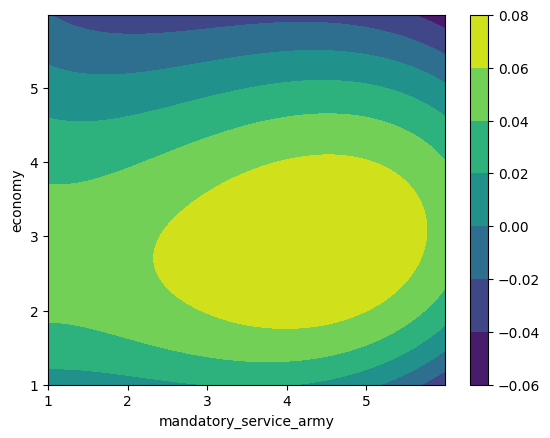

In [ ]:
X = np.arange(x_min, x_max+1, 1/100)
Y = np.arange(y_min, y_max+1, 1/100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots()
cont = ax.contourf(X, Y, Z_pred.reshape(X.shape))
fig.colorbar(cont)
x_label, y_label = list(policies)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

plt.show()

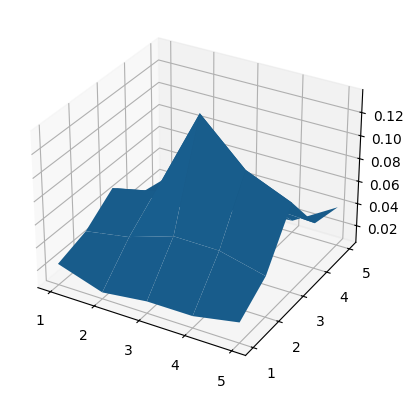

In [ ]:
X = np.arange(x_min, x_max+1)
Y = np.arange(y_min, y_max+1)
X, Y = np.meshgrid(X, Y)
ax = plt.figure().add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z.reshape(5,5))

plt.show()

<Axes: ylabel='Frequency'>

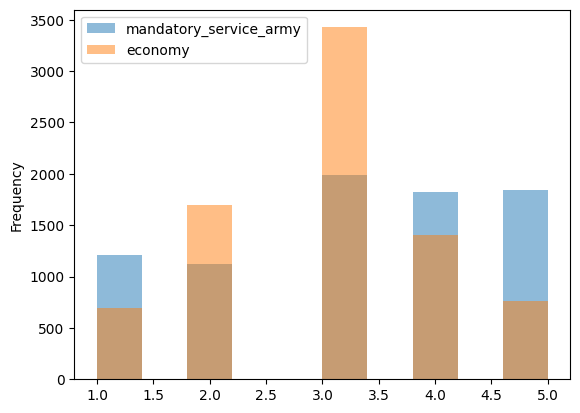

In [ ]:
df.plot.hist(alpha=0.5)